# 

Projet Machine Learning :
Reconnaissance Automatique des
Plaques d’Immatriculation à l’aide des
téchniques de Deep Learning

Random Image Display from a Directory

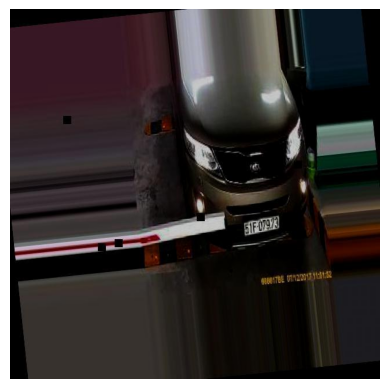

Displayed Image: CarLongPlateGen706_jpg.rf.a3b92b1311a6f4adc5adbfea8631f0bf.jpg


In [8]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to your 'train/images' directory
train_images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"  # Replace with your actual path

# Get a list of image files in the directory
image_files = os.listdir(train_images_dir)

# Pick a random image
image_file = random.choice(image_files)

# Load the image
image_path = os.path.join(train_images_dir, image_file)
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

print(f"Displayed Image: {image_file}")

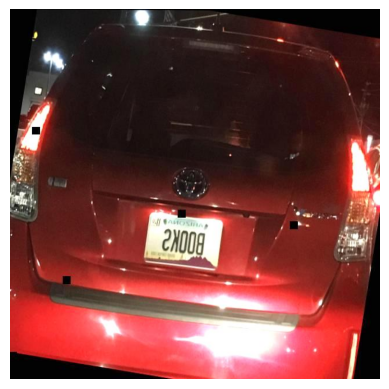

Displayed Image: pic_316_jpg.rf.e8db7a4e5757d5f2cee28959270863b0.jpg


In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to your 'train/images' directory
train_images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"  # Replace with your actual path

# Get a list of image files in the directory
image_files = os.listdir(train_images_dir)

# Pick a random image
image_file = random.choice(image_files)

# Load the image
image_path = os.path.join(train_images_dir, image_file)
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

print(f"Displayed Image: {image_file}")

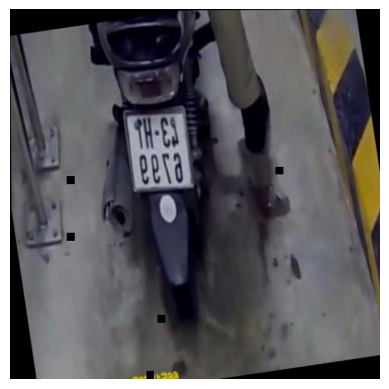

Displayed Image: xemay1136_jpg.rf.cf0e82cb574948d37dbb2b936f09130e.jpg


In [54]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to your 'train/images' directory
train_images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"  # Replace with your actual path

# Get a list of image files in the directory
image_files = os.listdir(train_images_dir)

# Pick a random image
image_file = random.choice(image_files)

# Load the image
image_path = os.path.join(train_images_dir, image_file)
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

print(f"Displayed Image: {image_file}")

Image Validity Check and Removal Script

In [20]:
import os
from PIL import Image
from tqdm import tqdm  # Install with: pip install tqdm

train_images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"

def check_image_validity(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return True
    except Exception as e:
        print(f"Error in image {image_path}: {e}")
        return False

# Check all images with a progress bar
image_files = os.listdir(train_images_dir)
for image_file in tqdm(image_files, desc="Checking images"):
    image_path = os.path.join(train_images_dir, image_file)
    if not check_image_validity(image_path):
        print(f"Removing invalid image: {image_file}")
        os.remove(image_path)


Checking images: 100%|██████████████████████████████████████████████████████████| 21145/21145 [00:32<00:00, 642.77it/s]


In [22]:
import os

# Paths
images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"
labels_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels"

# Get base names (without extensions)
image_basenames = {os.path.splitext(f)[0] for f in os.listdir(images_dir)}
label_basenames = {os.path.splitext(f)[0] for f in os.listdir(labels_dir)}

# 🗑️ Remove label files that don't have matching image
orphan_labels = label_basenames - image_basenames
for label in orphan_labels:
    label_path = os.path.join(labels_dir, label + ".txt")
    os.remove(label_path)
    print(f"Removed orphan label: {label_path}")

# 🗑️ (Optional) Remove images that don't have matching label
orphan_images = image_basenames - label_basenames
for image in orphan_images:
    image_path = os.path.join(images_dir, image + ".jpg")
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Removed orphan image: {image_path}")


Orphan Image and Label Removal Script

In [24]:
from PIL import Image, ImageDraw
import os

# Paths
images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"
labels_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels"

def show_image_with_boxes(image_name):
    img_path = os.path.join(images_dir, image_name)
    label_path = os.path.join(labels_dir, image_name.replace('.jpg', '.txt'))

    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)

    w, h = img.size
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                x0 = (x_center - width/2) * w
                y0 = (y_center - height/2) * h
                x1 = (x_center + width/2) * w
                y1 = (y_center + height/2) * h
                draw.rectangle([x0, y0, x1, y1], outline="red", width=2)

    img.show()

# Example:
show_image_with_boxes(r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\00c96e0e060aeb2f_jpg.rf.e36f7a2fa98cad0341a59440e7ddbb37.jpg")


Remove Unmatched Image and Label Files

In [26]:
import os

images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"
labels_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels"

image_files = set([os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')])
label_files = set([os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')])

# Iza ma kanch label m3a image, nglsso image
for img_file in image_files - label_files:
    img_path = os.path.join(images_dir, img_file + ".jpg")
    os.remove(img_path)
    print(f"Remove l'image with no label: {img_path}")

# Iza ma kanch image m3a label, nglsso label
for lbl_file in label_files - image_files:
    lbl_path = os.path.join(labels_dir, lbl_file + ".txt")
    os.remove(lbl_path)
    print(f"Remove label with no image: {lbl_path}")


Remove Images and Labels Without Valid License Plates

In [28]:
import os

# Set the directories
images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"
labels_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels"

# Function to check if the label contains a valid license plate
def has_license_plate(label_path):
    try:
        with open(label_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                # YOLO format: class x_center y_center width height (normalized)
                # Here we're assuming that class '0' corresponds to 'license plate' in your case
                class_id, x_center, y_center, width, height = map(float, line.split())
                if class_id == 0:  # Assuming '0' corresponds to 'license plate'
                    return True
        return False
    except Exception as e:
        print(f"Error processing label {label_path}: {e}")
        return False

# Check and remove images without license plates
image_files = os.listdir(images_dir)
for image_file in image_files:
    image_name = os.path.splitext(image_file)[0]  # Get the name without extension
    image_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, image_name + '.txt')

    # Check if label exists and contains a license plate
    if not os.path.exists(label_path) or not has_license_plate(label_path):
        print(f"Removing image without license plate: {image_path}")
        os.remove(image_path)  # Remove image

        if os.path.exists(label_path):
            print(f"Removing corresponding label: {label_path}")
            os.remove(label_path)  # Remove corresponding label


Resize All Images in Directory to 640x640

In [ ]:
import os
from PIL import Image

# Path to the images directory
images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"

# Desired image size
img_size = (640, 640)

# Resize all images
for image_file in os.listdir(images_dir):
    img_path = os.path.join(images_dir, image_file)
    
    try:
        with Image.open(img_path) as img:
            img = img.resize(img_size)  # Resize the image
            img.save(img_path)  # Save the resized image back
            print(f"Resized {image_file}")
    except Exception as e:
        print(f"Error resizing image {image_file}: {e}")


Resized 00009e5b390986a0_jpg.rf.04d1cbabbde68b6be73ada81c47f3528.jpg
Resized 00009e5b390986a0_jpg.rf.134d6373e0bde30fc8b9747bc1232667.jpg
Resized 00009e5b390986a0_jpg.rf.e2f9df03aa702fad603db72632cae9cc.jpg
Resized 000228608388803f_jpg.rf.5ab7879e18b0d42fc40013f4da243d25.jpg
Resized 000228608388803f_jpg.rf.924b00a39d9fad9da20e784dacfc41b7.jpg
Resized 000228608388803f_jpg.rf.fbf08c48170038e42cceb5f39a174f49.jpg
Resized 00043e7c5c4c025a_jpg.rf.1302d567f044eda1faa2142fb70f12d0.jpg
Resized 00043e7c5c4c025a_jpg.rf.268ab2b01d525a914c7dd6d4508c4c7c.jpg
Resized 00043e7c5c4c025a_jpg.rf.a0941a2e1f610209d160a8e2ce04d784.jpg
Resized 0005ea10e0e14db1_jpg.rf.2f7e68bd5f88bd6559707bb3a68b9f78.jpg
Resized 0005ea10e0e14db1_jpg.rf.73688073672368e0c3cb4ff5e00d583e.jpg
Resized 0005ea10e0e14db1_jpg.rf.acbd1a88ed94354ff7305f00d6612c7c.jpg
Resized 0006dc0977056410_jpg.rf.5b81e065d28070f1f65fa050ab88ea94.jpg
Resized 0006dc0977056410_jpg.rf.8553128effcd6da4d8cabe5145d80c74.jpg
Resized 0006dc0977056410_jpg.rf.c5

Find and Remove Duplicate Images in Directory

In [30]:
import os
from hashlib import md5

def find_duplicates(directory):
    seen = {}
    duplicates = []

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'rb') as file:
            file_hash = md5(file.read()).hexdigest()
            if file_hash in seen:
                duplicates.append(filepath)
            else:
                seen[file_hash] = filepath

    return duplicates

images_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images"
duplicates = find_duplicates(images_dir)

# Optionally remove duplicates
for duplicate in duplicates:
    print(f"Removing duplicate image: {duplicate}")
    os.remove(duplicate)


Check for Missing Labels and Remove Corresponding Images

In [32]:
import os

# Path to labels directory
labels_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels"

# Function to check if label exists for every image
def check_labels():
    for image_file in os.listdir(images_dir):
        label_file = image_file.replace(".jpg", ".txt")  # Assuming images are .jpg and labels are .txt
        label_path = os.path.join(labels_dir, label_file)
        
        if not os.path.exists(label_path):
            print(f"Warning: No label for image {image_file}")
            os.remove(os.path.join(images_dir, image_file))  # Optional: Remove image without label
        else:
            print(f"Label exists for {image_file}")

check_labels()


Label exists for 00009e5b390986a0_jpg.rf.04d1cbabbde68b6be73ada81c47f3528.jpg
Label exists for 00009e5b390986a0_jpg.rf.134d6373e0bde30fc8b9747bc1232667.jpg
Label exists for 00009e5b390986a0_jpg.rf.e2f9df03aa702fad603db72632cae9cc.jpg
Label exists for 000228608388803f_jpg.rf.5ab7879e18b0d42fc40013f4da243d25.jpg
Label exists for 000228608388803f_jpg.rf.924b00a39d9fad9da20e784dacfc41b7.jpg
Label exists for 000228608388803f_jpg.rf.fbf08c48170038e42cceb5f39a174f49.jpg
Label exists for 00043e7c5c4c025a_jpg.rf.1302d567f044eda1faa2142fb70f12d0.jpg
Label exists for 00043e7c5c4c025a_jpg.rf.268ab2b01d525a914c7dd6d4508c4c7c.jpg
Label exists for 00043e7c5c4c025a_jpg.rf.a0941a2e1f610209d160a8e2ce04d784.jpg
Label exists for 0005ea10e0e14db1_jpg.rf.2f7e68bd5f88bd6559707bb3a68b9f78.jpg
Label exists for 0005ea10e0e14db1_jpg.rf.73688073672368e0c3cb4ff5e00d583e.jpg
Label exists for 0005ea10e0e14db1_jpg.rf.acbd1a88ed94354ff7305f00d6612c7c.jpg
Label exists for 0006dc0977056410_jpg.rf.5b81e065d28070f1f65fa05

Clean Data by Removing Images Without Labels

In [34]:
# Ensure images and labels match
def clean_data(images_dir, labels_dir):
    for image_file in os.listdir(images_dir):
        label_file = image_file.replace(".jpg", ".txt")
        label_path = os.path.join(labels_dir, label_file)
        
        if not os.path.exists(label_path):
            print(f"Deleting image {image_file} because it has no label")
            os.remove(os.path.join(images_dir, image_file))  # Remove image without label

# Clean data
clean_data(images_dir, labels_dir)


In [36]:
with open(r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\data.yaml") as f:
    print(f.read())

# data.yaml - Version OptimisÃ©e
train: ./train/images
val: ./valid/images
test: ./test/images  # Optionnel si vous utilisez le test set

nc: 1
names: ['License_Plate']

# Supprimez TOUTES les lignes Roboflow (inutiles pour l'entraÃ®nement)


Training YOLOv8 on License Plate Recognition Dataset

In [ ]:
from ultralytics import YOLO
import os
import torch

def train():
    # 1. Use absolute path to avoid confusion
    dataset_path = r'C:/Users/user/Desktop/License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch'
    data_path = os.path.join(dataset_path, "data.yaml")
    
    # 2. Check if YAML exists
    if not os.path.exists(data_path):
        print(f"[ERROR] data.yaml not found in: {data_path}")
        print("Files available in folder:", os.listdir(dataset_path))
        return

    # 3. Use small model (to reduce memory pressure)
    model = YOLO('yolov8n.pt')  # or 'yolov5n.pt' if you want the v5 version

    # 4. Train on CPU, reduce batch size to lower RAM usage
    try:
        results = model.train(
            data=data_path,
            epochs=3,            # Use fewer epochs to start
            imgsz=640,
            batch=8,             # Reduce batch size to avoid memory overload
            device='cpu',        # or '0' if you have a GPU
            workers=0            # Important for Windows to avoid multiprocessing issues
        )
        print("Training completed successfully.")
        return results
    except Exception as e:
        print("[ERROR] Training failed:", str(e))

if __name__ == '__main__':
    train_results = train()


New https://pypi.org/project/ultralytics/8.3.123 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.116  Python-3.12.4 torch-2.6.0+cpu CPU (Intel Core(TM) i5-10310U 1.70GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/user/Desktop/License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\data.yaml, epochs=3, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

train: Scanning C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels


val: Fast image access  (ping: 0.00.0 ms, read: 312.781.3 MB/s, size: 35.9 KB)


val: Scanning C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\valid\labels.c


Plotting labels to runs\detect\train8\labels.jpg... 


Listing All Training Runs for YOLOv8 Detection

In [3]:
import os

# List all training runs
print(os.listdir('runs/detect'))


['predict', 'predict2', 'train', 'train10', 'train2', 'train3', 'train4', 'train5', 'train6', 'train7', 'train8', 'train9', 'val', 'val2', 'val3', 'val4', 'val5', 'val6', 'val7', 'val8', 'val9']


Fine-tuning YOLOv8 Model with Last Trained Weights

In [15]:
from ultralytics import YOLO

# Load last trained weights
model = YOLO('runs/detect/train2/weights/last.pt')

# Start a new training (but initialized from your last weights)
model.train(
    data='C:/Users/user/Desktop/License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch/data.yaml',
    epochs=20,  # number of new epochs you want
    imgsz=640,
    batch=16,
    device='cpu'  # because you don't have GPU
)


New https://pypi.org/project/ultralytics/8.3.124 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.116  Python-3.12.4 torch-2.6.0+cpu CPU (Intel Core(TM) i5-10310U 1.70GHz)
engine\trainer: task=detect, mode=train, model=runs/detect/train2/weights/last.pt, data=C:/Users/user/Desktop/License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

train: Scanning C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\labels.cache... 21145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21145/21145 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.80.2 ms, read: 2.00.5 MB/s, size: 35.9 KB)


val: Scanning C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.599      1.582      1.558          8        640: 100%|██████████| 1322/1322 [7:36:25<00:00, 20.72s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [12:30<00:00, 11.72s/it]

                   all       2046       2132      0.906      0.864      0.885      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       1.62      1.605      1.581         10        640: 100%|██████████| 1322/1322 [10:40:33<00:00, 29.07s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [13:53<00:00, 13.02s/it]

                   all       2046       2132      0.922      0.898      0.908       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.575      1.542      1.544          9        640: 100%|██████████| 1322/1322 [6:18:23<00:00, 17.17s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [12:49<00:00, 12.02s/it]


                   all       2046       2132      0.931      0.897      0.915      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.516      1.473      1.494          9        640: 100%|██████████| 1322/1322 [8:35:04<00:00, 23.38s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [17:12<00:00, 16.14s/it]

                   all       2046       2132      0.888      0.901      0.914      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.468      1.413      1.462         17        640:  30%|██▉       | 396/1322 [7:59:01<18:40:08, 72.58s/it]    


KeyboardInterrupt: 

License Plate Detection and Cropping Using YOLOv8

In [3]:
from ultralytics import YOLO
import cv2

# 1. Load your trained model
model = YOLO('runs/detect/train2/weights/best.pt')  # this is YOUR path

# 2. Load your image
img = cv2.imread(r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\CarLongPlateGen2493_jpg.rf.5d2dbbec1f138b723fbc154d1326b384.jpg")

# 3. Predict
results = model.predict(source=r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\CarLongPlateGen2493_jpg.rf.5d2dbbec1f138b723fbc154d1326b384.jpg", save=False)

# 4. Loop over detections and crop the plates
for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box)
    plate_crop = img[y1:y2, x1:x2]
    cv2.imwrite(f"plate_{i}.jpg", plate_crop)  # Save each plate with a different name



image 1/1 C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\CarLongPlateGen2493_jpg.rf.5d2dbbec1f138b723fbc154d1326b384.jpg: 640x640 1 License_Plate, 1872.3ms
Speed: 14.7ms preprocess, 1872.3ms inference, 27.8ms postprocess per image at shape (1, 3, 640, 640)


License Plate Detection from a Single Image Using YOLOv8

In [7]:
img_path = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\CarLongPlateGen2493_jpg.rf.5d2dbbec1f138b723fbc154d1326b384.jpg"

results = model.predict(img_path)



image 1/1 C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\CarLongPlateGen2493_jpg.rf.5d2dbbec1f138b723fbc154d1326b384.jpg: 640x640 1 License_Plate, 398.7ms
Speed: 5.7ms preprocess, 398.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


In [1]:
from ultralytics import YOLO

# Load the best trained model
model = YOLO('runs/detect/train2/weights/best.pt')
# Predict on a single image
results = model.predict(source=r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\1_jpg.rf.4f6430ff8c43e3583e55816351423f6c.jpg", save=True, imgsz=640)

# Example:
# results = model.predict(source='C:/Users/user/Desktop/car.jpg', save=True)



image 1/1 C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\1_jpg.rf.4f6430ff8c43e3583e55816351423f6c.jpg: 640x640 1 License_Plate, 789.3ms
Speed: 10.0ms preprocess, 789.3ms inference, 14.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


In [3]:
import os
print(os.getcwd())


C:\Users\user


License Plate Text Detection Using EasyOCR and OpenCV

In [ ]:
import cv2
import easyocr

# Path to your image (replace with your actual image path)
img_path = r"C:\Users\user\Desktop\plate.jpg"

# Read the image (resize if it's large to save memory)
img = cv2.imread(img_path)
img = cv2.resize(img, (640, 480))  # Optional: reduces memory usage

# Initialize EasyOCR reader (do it once only)
reader = easyocr.Reader(['en'], gpu=False)

# Run OCR
results = reader.readtext(img)

# Show results
for detection in results:
    text = detection[1]
    print("Detected Text:", text)


In [7]:
pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
    --------------------------------------- 0.0/2.9 MB 653.6 kB/s eta 0:00:05
    --------------------------------------- 0.0/2.9 MB 653.6 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.9 MB 656.4 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.9 MB 656.4 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.9 MB 656.4 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/2.9 MB 458.0 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/2.9 MB 458.0 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/2.9 MB 458.0 kB/s eta 0:00:06
   --- ------------------------------------ 0.2/2.9 MB 533.8 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.9 MB 533.8 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.9 MB 533.8 kB/s eta 0:00:05
   -

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
from ultralytics import YOLO

# Load the best model from the trained weights (epoch 4)
model = YOLO('runs/detect/train2/weights/best.pt')  # Make sure this is the correct path to 'best.pt'


In [2]:
from ultralytics import YOLO

# Load the best model from the trained weights (epoch 4)
model = YOLO('runs/detect/train2/weights/best.pt')  # Adjust path if necessary

# Path to the image for prediction
img_path = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\xemay2079_jpg.rf.db98a5ba0d4a7737ce267498a2aaa2d6.jpg"
# Perform prediction
results = model.predict(img_path)

# Access the first image result (as the list can contain multiple results)
result = results[0]

# Display the results (bounding boxes and labels on the image)
result.show()  # This should now work with the correct object



image 1/1 C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\xemay2079_jpg.rf.db98a5ba0d4a7737ce267498a2aaa2d6.jpg: 640x640 1 License_Plate, 398.7ms
Speed: 12.8ms preprocess, 398.7ms inference, 12.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
from ultralytics import YOLO
import cv2
import easyocr

# Load YOLO model
model = YOLO('runs/detect/train2/weights/best.pt')

# Load image
img_path = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\train\images\xemay2079_jpg.rf.db98a5ba0d4a7737ce267498a2aaa2d6.jpg"
image = cv2.imread(img_path)

# Run prediction
results = model.predict(source=img_path, conf=0.3)
boxes = results[0].boxes.xyxy.cpu().numpy()

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

# Process each detected plate
for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    plate_crop = image[y1:y2, x1:x2]  # Crop the detected plate
    ocr_result = reader.readtext(plate_crop)

    for _, text, _ in ocr_result:
        print("Detected plate:", text)


In [5]:
import pandas as pd

# Load the CSV
results_path = r"C:\Users\user\runs\detect\train2\results.csv"
df = pd.read_csv(results_path)

# Print column names
print(df.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Training loss data
epochs = np.arange(1, 21)
box_loss = np.array([
    1.242, 1.247, 1.245, 1.226, 1.185, 1.164, 1.142, 1.115, 1.109, 1.089,
    1.077, 1.059, 1.039, 1.021, 1.012, 0.998, 0.9832, 0.9634, 0.9537, 0.936
])

cls_loss = np.array([
    1.519, 0.8252, 0.7482, 0.7101, 0.6548, 0.6239, 0.5957, 0.5746, 0.5535, 0.5409,
    0.466, 0.4512, 0.4357, 0.4189, 0.4121, 0.3965, 0.3857, 0.3726, 0.3644, 0.3521
])

dfl_loss = np.array([
    1.204, 1.221, 1.227, 1.221, 1.205, 1.192, 1.178, 1.167, 1.162, 1.149,
    1.168, 1.157, 1.148, 1.141, 1.132, 1.124, 1.116, 1.106, 1.101, 1.089
])

# Create figure with 3 separate plots
plt.figure(figsize=(18, 5))

# Box Loss Plot
plt.subplot(1, 3, 1)
plt.plot(epochs, box_loss, 'b-o', linewidth=2, markersize=6)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Box Loss Over Training', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 21, 2))

# Classification Loss Plot
plt.subplot(1, 3, 2)
plt.plot(epochs, cls_loss, 'r-o', linewidth=2, markersize=6)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Classification Loss Over Training', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 21, 2))

# DFL Loss Plot
plt.subplot(1, 3, 3)
plt.plot(epochs, dfl_loss, 'g-o', linewidth=2, markersize=6)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('DFL Loss Over Training', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 21, 2))

plt.tight_layout()
plt.show()

YOLO Model Evaluation for License Plate Recognition: Precision, Recall, and F1-Score Calculation

In [ ]:
import os
import time
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score

# === Paths ===
image_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\test\images"
label_dir = r"C:\Users\user\Desktop\License Plate Recognition.v4-resized640_aug3x-accurate.yolov5pytorch\test\labels"
model_path = r"C:\Users\user\Desktop\yolov8_license_plate_best.pt"

# === Load model ===
model = YOLO(model_path)
model.fuse()

# === Utility: Compute IoU ===
def compute_iou(box1, box2):
    # box: [x1, y1, x2, y2]
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0.0

# === Initialize counters ===
TP = 0
FP = 0
FN = 0
num_images = 0
start_time = time.time()

image_fnames = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

for fname in image_fnames:
    image_path = os.path.join(image_dir, fname)
    label_path = os.path.join(label_dir, os.path.splitext(fname)[0] + ".txt")
    if not os.path.exists(label_path):
        continue

    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Load GT boxes
    gt_boxes = []
    gt_classes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                cls = int(parts[0])
                xc, yc, bw, bh = map(float, parts[1:])
                x1 = (xc - bw / 2) * w
                y1 = (yc - bh / 2) * h
                x2 = (xc + bw / 2) * w
                y2 = (yc + bh / 2) * h
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(cls)

    # Predict
    results = model.predict(source=img, conf=0.25, iou=0.5, verbose=False)[0]
    preds = results.boxes
    pred_boxes = preds.xyxy.cpu().numpy() if preds is not None else []
    pred_classes = preds.cls.cpu().numpy().astype(int).tolist() if preds is not None else []

    matched_gt = set()

    for pred_box, pred_cls in zip(pred_boxes, pred_classes):
        best_iou = 0
        best_idx = -1
        for i, (gt_box, gt_cls) in enumerate(zip(gt_boxes, gt_classes)):
            if i in matched_gt or pred_cls != gt_cls:
                continue
            iou = compute_iou(pred_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_idx = i
        if best_iou >= 0.5:
            TP += 1
            matched_gt.add(best_idx)
        else:
            FP += 1

    FN += len(gt_boxes) - len(matched_gt)
    num_images += 1

# === Compute metrics ===
end_time = time.time()
total_time = end_time - start_time
fps = num_images / total_time if total_time > 0 else 0.0

precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

# === Print results ===
print("\n--- Evaluation Metrics on Test Set ---")
print(f"Precision (IoU ≥ 0.5):  {precision:.4f}")
print(f"Recall (IoU ≥ 0.5):     {recall:.4f}")
print(f"F1-score:               {f1:.4f}")
print(f"Latency (FPS):          {fps:.2f}")
